In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import StandardScaler

In [105]:
class GPR_Ensemble:
    def __init__(self, n = 50, kernel = RBF(), scaling = True):
        
        """
        n: number of Gaussian ProcessRegressor models
        kernels: either an instantiated kernel or n instantiated kernels
        """
        self.n = n
        self.scaling = scaling
        
        if hasattr(kernel, '__iter__'):
            assert len(kernel) == n, "Invalid number of kernels"
            
            self.models = [GaussianProcessRegressor(kernel = k, copy_X_train = False) for k in kernel]
        else:
            self.models = [GaussianProcessRegressor(kernel = kernel, copy_X_train = False) for k in range(n)]
            
        
    
    # Fits GPR models on different 
    def fit(self, X, y):
        
        if self.scaling:
            self.scaler = StandardScaler().fit(X)
            X = self.scaler.transform(X)
        
        X_split = np.array_split(X, self.n)
        y_split = np.array_split(y, self.n)
        
        assert list(map(len, X_split)) == list(map(len, y_split)), "Error while splitting data"
        
        for i in range(self.n):
            self.models[i].fit(X_split[i], y_split[i])
            
            
    def predict(self, X):
        
        if self.scaling:
            X = self.scaler.transform(X)
        
        preds = []
        weights = []
        
        for model in self.models:
            prediction, std = model.predict(X, return_std=True)
            preds.append(prediction)
            weights.append(1/(std + 1e-8))
        
        preds = np.array(preds)
        weights = np.array(weights)
        
        return np.average(preds, axis = 0, weights = weights)
        
    def score(self, X, y):
        y_pred = self.predict(X)
        u = ((y - y_pred)** 2).sum()
        v = ((y - y.mean()) ** 2).sum()
        return 1 - u/v
        
    

In [106]:
from data_helper import *

In [107]:
X_train = dataset_in["train"]["full"]
y_train = dataset_in["train"]["y"]

X_val = dataset_in["val"]["full"]
y_val = dataset_in["val"]["y"]

In [108]:
for scaling in (True, False):
    model = GPR_Ensemble(scaling = scaling)
    model.fit(X_train, y_train)
    print(scaling, model.score(X_val, y_val))

C:\Users\Stephen\Anaconda3\envs\proj38\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Stephen\Anaconda3\envs\proj38\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


True 0.8346568146453675
False 0.7209556703898863


In [84]:
ns = [5*i for i in range(5, 6)]
val_scores = []
for n in ns:
    model = GPR_Ensemble(n)
    model.fit(X_train, y_train)
    val_scores.append(model.score(X_val, y_val))

C:\Users\Stephen\Anaconda3\envs\proj38\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Stephen\Anaconda3\envs\proj38\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Stephen\Anaconda3\envs\proj38\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    h

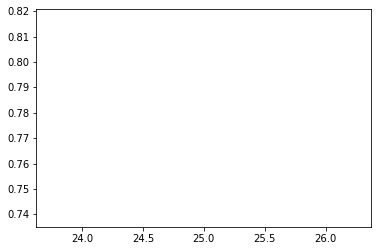

In [85]:
plt.plot(ns, val_scores)

In [86]:
val_scores

[0.7779052318734283]

In [80]:
1/(np.array([1, 2, 3]) + 1e-8)

array([0.99999999, 0.5       , 0.33333333])

In [99]:
scaler = StandardScaler().fit(X_train)
np.array(X_train)[0]

array([-1.82094408e+00,  1.96537548e-02,  1.15266096e+01,  3.25407194e-01,
        1.08098833e-01,  2.46947145e+00,  3.50884297e+00,  7.23755705e-02,
        9.03141361e-02,  1.23923332e+00, -3.12383161e+00,  2.58356666e+00,
        2.71604770e+00,  3.32631141e+00,  1.86180340e+01,  3.45908620e+00,
        2.25392297e-02, -4.29177700e-02,  6.61556550e+00,  2.07598268e+01,
        2.02773733e+00,  1.33231906e-01, -3.59881360e-02,  2.59611296e-02,
        6.42801647e+00,  8.52125270e+01,  4.91104412e+00,  2.39064051e+00,
       -1.25872736e-02,  9.56494791e+00,  2.70922334e+00, -5.30131905e-03,
        1.03151998e+01,  6.97311694e+01,  2.94198447e+00,  7.19136822e+00,
        1.48110565e+00,  4.29041554e+00,  3.63874346e-02,  4.30000000e+01,
        3.94845666e+00, -1.38322375e+00,  8.84450785e-02,  3.13693143e+00,
        2.07586245e+00,  1.00000000e+01,  7.42744751e-01,  3.12624486e-02,
        9.95195607e-03])

In [96]:
scaler.transform(X_train)

array([[-0.31159226,  0.20596629, -0.14059157, ...,  0.47055338,
        -0.12002511, -0.50260358],
       [ 0.50192504,  0.37784699,  0.26394937, ...,  0.5169528 ,
        -0.3998885 ,  1.27154741],
       [ 0.70054892,  0.05271498, -0.55180123, ..., -0.23103935,
        -0.20442035,  0.1783601 ],
       ...,
       [-0.30363762,  0.58577055, -0.14059157, ...,  0.21476437,
         0.09356464, -0.50260358],
       [ 0.48369111, -1.20348368, -0.39596156, ..., -0.50772606,
         0.06909328, -0.56612148],
       [ 0.26092702, -1.44029675,  0.86164504, ..., -0.52185404,
        -0.1132731 , -0.27633296]])